In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
ser = pd.read_csv('https://raw.githubusercontent.com/FlorinAndrei/misc/master/qdata.csv', index_col=0, squeeze=True)
ser

x
0      473.917764
1       75.324825
2     -306.969479
3       53.271476
4      372.966686
5     1109.156076
6      234.800882
7     -476.118571
8      557.930310
9      447.361024
10    -630.284585
11     272.969054
12    -215.677306
13     -61.115477
14    -665.477648
15     524.789852
16     647.517705
17     133.766937
18     607.339102
19     401.896557
20      21.595559
21      19.882890
22     494.845027
23     -12.655813
24     569.300726
25     132.230563
26     175.313147
27     626.257093
28      18.394902
29    1007.627797
         ...     
70    2273.008645
71    2774.985389
72    2789.391769
73    3965.323168
74    2769.207398
75    2246.664586
76    3457.436669
77    2782.375917
78    2931.444696
79    2840.142435
80    3058.259910
81    3561.495722
82    3084.272305
83    3339.066051
84    4530.445388
85    3747.694270
86    4185.601073
87    4478.946528
88    4396.058299
89    3968.213162
90    4884.711407
91    5029.985056
92    4260.625206
93    3956.625738
94    44

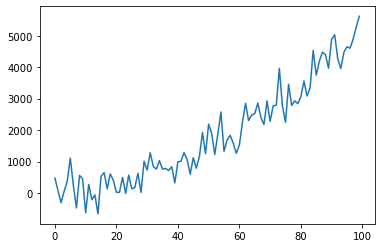

In [2]:
plt.plot(ser)
plt.show()

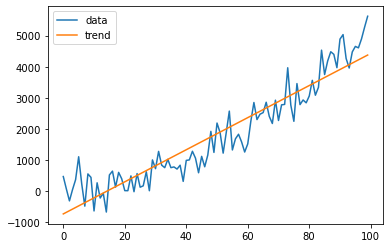

In [3]:
X = ser.index
X = np.reshape(X, (len(X), 1))
y = ser.values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)
plt.legend(['data', 'trend'])
plt.show()

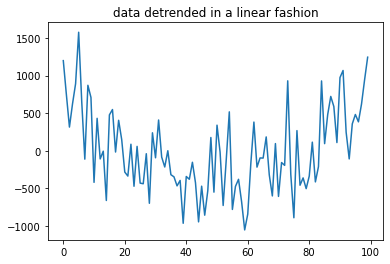

In [4]:
detr = [y[i] - trend[i] for i in range(0, len(y))]
plt.plot(detr)
plt.title('data detrended in a linear fashion')
plt.show()

In [5]:
r2 = r2_score(y, trend)
rmse = np.sqrt(mean_squared_error(y, trend))
print('r2:', r2)
print('rmse', rmse)

r2: 0.8782399672701932
rmse 553.6078593008506


In [6]:
pf = PolynomialFeatures(degree=2)
Xp = pf.fit_transform(X)
Xp

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.29

In [7]:
md2 = LinearRegression()
md2.fit(Xp, y)
trendp = md2.predict(Xp)

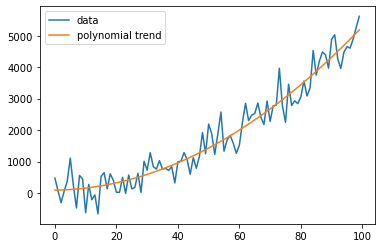

In [8]:
plt.plot(X, y)
plt.plot(X, trendp)
plt.legend(['data', 'polynomial trend'])
plt.show()

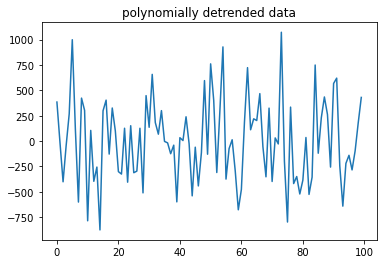

In [9]:
detrpoly = [y[i] - trendp[i] for i in range(0, len(y))]
plt.plot(X, detrpoly)
plt.title('polynomially detrended data')
plt.show()

In [10]:
r2 = r2_score(y, trendp)
rmse = np.sqrt(mean_squared_error(y, trendp))
print('r2:', r2)
print('rmse', rmse)

r2: 0.9343217231542871
rmse 406.5937924291518
